In [ ]:

!pip install rfpimp
!pip install catboost

     |████████████████████████████████| 163kB 7.4MB/s 
  Created wheel for rfpimp: filename=rfpimp-1.3.5-cp36-none-any.whl size=10260 sha256=26ca35800e860ce2bb7d46ec679b19d9a2b86482fa6a3c9b9c90b3667c035e99
  Stored in directory: /root/.cache/pip/wheels/2a/c8/bf/80f91224be00870f84a85aa1782cf6cd62c1289a173b66b8e9
  Created wheel for stratx: filename=stratx-0.4.1-cp36-none-any.whl size=35079 sha256=bafebdf8681ec8e0d6a83d83c99762d85776a0fb31498965a539c58a12fd7eec
  Stored in directory: /root/.cache/pip/wheels/ca/c1/e1/3e4c41e3420fe9c706dd4d8ef8d7fb5aba1b6a9547649a2d00
Successfully built rfpimp stratx
     |████████████████████████████████| 65.9MB 60kB/s 


In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from rfpimp import *
from sklearn import svm
import xgboost as xgb
import lightgbm as lgb
from mlxtend.classifier import StackingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder

In [ ]:
train=pd.read_csv('/content/Train_aBjfeNk.csv')
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
test=pd.read_csv('/content/Test_LqhgPWU.csv')
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [ ]:
sub=pd.read_csv('/content/sample_submission_wyi0h0z.csv')
sub.head()

,ID,Segmentation
0,458989,A
1,458994,A
2,458996,A
3,459000,A
4,459001,A


In [ ]:
train['source']='train'
test['source']='test'
data=pd.concat([train,test],ignore_index=True,sort=False)
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,source
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,train
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,train
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,train
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,train
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A,train


In [ ]:
data.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
source                0
dtype: int64

In [ ]:
missing_impute=-999

In [ ]:
data['Work_Experience'] = data['Work_Experience'].apply(lambda x: missing_impute if pd.isna(x) else x)
data['Family_Size'] = data['Family_Size'].apply(lambda x: missing_impute if pd.isna(x) else x)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     8068 non-null   object 
 11  source           10695 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1002.8+ KB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
 11  source           8068 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 756.5+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  source           2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB


In [ ]:
# Let's check the frequency distribution of the feature
for col in train:
  freq=train[col].value_counts()
  print('\nThe frequency distribution of '+col+ ":")
  print(freq)  


The frequency distribution of ID:
460799    1
466217    1
460042    1
462091    1
464144    1
         ..
463511    1
467609    1
461468    1
459421    1
460801    1
Name: ID, Length: 8068, dtype: int64

The frequency distribution of Gender:
Male      4417
Female    3651
Name: Gender, dtype: int64

The frequency distribution of Ever_Married:
Yes    4643
No     3285
Name: Ever_Married, dtype: int64

The frequency distribution of Age:
35    250
37    234
33    232
42    232
27    229
     ... 
78     29
87     28
76     27
80     24
85     22
Name: Age, Length: 67, dtype: int64

The frequency distribution of Graduated:
Yes    4968
No     3022
Name: Graduated, dtype: int64

The frequency distribution of Profession:
Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

The frequency distribution of Work_Experience:


In [ ]:
data.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation', 'source'],
      dtype='object')

**EDA**

In [ ]:
#Now lets see the percentage of segmentation
A=train[train['Segmentation']=='A']
B=train[train['Segmentation']=='B']
C=train[train['Segmentation']=='C']
D=train[train['Segmentation']=='D']
Ap=(len(A)/len(train))*100
print('A IS')
print(Ap)
Bp=(len(B)/len(train))*100
print('B IS')
print(Bp)
Cp=(len(C)/len(train))*100
print('C IS')
print(Cp)
Dp=(len(D)/len(train))*100
print('D IS')
print(Dp)

A IS
24.442240951908776
B IS
23.029251363411007
C IS
24.4174516608825
D IS
28.11105602379772


In [ ]:
pd.crosstab(train['Gender'],train['Segmentation'],normalize='index')

Segmentation,A,B,C,D
Gender,,,,
Female,0.248973,0.235826,0.252534,0.262668
Male,0.240661,0.225719,0.237265,0.296355


In [ ]:
pd.crosstab(train['Ever_Married'],train['Segmentation'],normalize='index')

Segmentation,A,B,C,D
Ever_Married,,,,
No,0.243836,0.145814,0.121157,0.489193
Yes,0.244885,0.290330,0.333621,0.131165


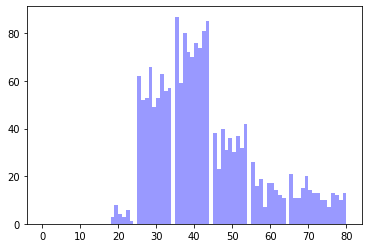

In [ ]:
sns.distplot(A['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')

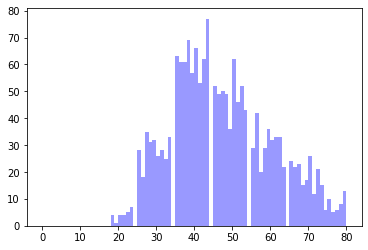

In [ ]:
sns.distplot(B['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')

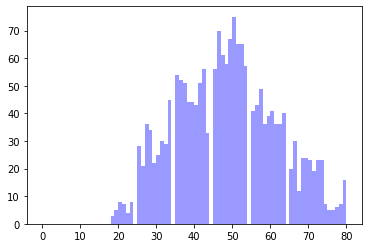

In [ ]:
sns.distplot(C['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')

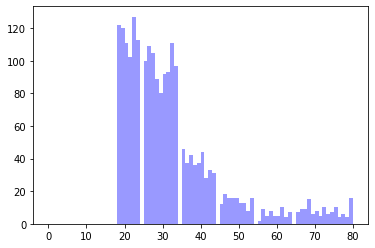

In [ ]:
sns.distplot(D['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')

In [ ]:
pd.crosstab(train['Var_1'],train['Segmentation'],normalize='index')

Segmentation,A,B,C,D
Var_1,,,,
Cat_1,0.233083,0.195489,0.195489,0.375940
Cat_2,0.196682,0.251185,0.234597,0.317536
Cat_3,0.271290,0.226277,0.187348,0.315085
Cat_4,0.305785,0.213039,0.100092,0.381084
Cat_5,0.223529,0.235294,0.211765,0.329412
Cat_6,0.231577,0.235204,0.285605,0.247614
Cat_7,0.251232,0.211823,0.231527,0.305419


**LABEL ENCODING**

In [ ]:
gender_map = {
    'Male':0,
    'Female':1
}
Ever_Married = {
    'No':0,
    'Yes':1
}
grad = {
    'No':0,
    'Yes':1
}
spend_score ={
    'Low':0,
    'Average':1,
    'High':2
}
var1 ={
    'Low':0,
    'Average':1,
    'High':2
}
proff ={'Artist': 0,
 'Healthcare': 1,
 'Entertainment': 2,
 'Engineer':3,
 'Doctor': 4,
 'Lawyer': 5,
 'Executive': 6,
 'Marketing': 7,
 'Homemaker': 8}
cat_var = {'Cat_6': 5,
           'Cat_4': 3,
 'Cat_3': 2,
 'Cat_2': 1,
 'Cat_7': 6,
 'Cat_1': 0,
 'Cat_5': 4}

seg ={
    'A':0,
    'B':1,
    'C':2,
    'D':3
}
    
rev_seg ={
    0:'A',
    1:'B',
    2:'C',
    3:'D'
}
map_bins = {'35-45': 3,
 '25-35': 2,
 '45-55': 4,
 '65-100': 6,
 '0-25': 1,
 '55-65': 5}

In [ ]:
le = LabelEncoder()
data["Prof+Grad"] = data["Profession"].fillna('-9999')+"_"+data["Graduated"].astype(str)
data["Prof+Grad"] = le.fit_transform(data["Prof+Grad"])

In [ ]:
data['Gender'] =data['Gender'].map(gender_map)
data['Ever_Married'] = data['Ever_Married'].map(Ever_Married)
data['Graduated'] = data['Graduated'].map(grad)
data['Profession']= data['Profession'].map(proff)
data['Spending_Score'] = data['Spending_Score'].map(spend_score)
data['Var_1'] = data['Var_1'].map(cat_var)
data['Segmentation'] = data['Segmentation'].map(seg)

In [ ]:

def get_age_groups(x):
    if x <= 25:
        return '0-25'
    if x > 25 and x<=35:
        return '25-35'
    if x>35 and x<=45:
        return '35-45'
    if x>45 and x<=55:
        return '45-55'
    if x>55 and x<=65:
        return '55-65'
    else:
        return '65-100'

In [ ]:
map_bins = {'35-45': 3,
 '25-35': 2,
 '45-55': 4,
 '65-100': 6,
 '0-25': 1,
 '55-65': 5}
data['Age_Bins'] = data['Age'].apply(lambda x:get_age_groups(x))
data['Age_Bins'] = data['Age_Bins'].map(map_bins)

In [ ]:

for i in range(1,10):
#     data[f'prev_target_{i}'] = full_df.sort_values(by='ID')['Segmentation'].fillna(method='ffill').shift(i).sort_index()
    data[f'prev_target_{i}'] = data.sort_values(by='ID')['Segmentation'].fillna(method='bfill').shift(-i).sort_index()
    # full_df[f'magic_{i}'] = full_df.sort_values(by='ID')['Segmentation'].shift(-i).expanding().mean().fillna(method='bfill').sort_index()
    # full_df[f'next_{i}_insects'] = full_df.sort_values(by='ID').groupby(['Age'])['Segmentation'].apply(lambda x: x.shift(i).ffill())

In [ ]:
temp = data.groupby(['Age']).agg({'Spending_Score':['count','mean','sum'],
                                   'Work_Experience':['count','sum','min','max','mean'],
                                   'Profession':['min','max'],
                                       'Family_Size':['sum','min','max'],
                                       'Age':['count'],
                                    'Var_1':['count','max','min']})
temp.columns = ['_'.join(x) for x in temp.columns]
data = pd.merge(data,temp,on=['Age'],how='left')

In [ ]:
temp = data.groupby(['Profession']).agg({
                                       'Age':['count','sum','min','max']})
temp.columns = ['_Prof_'.join(x) for x in temp.columns]
data = pd.merge(data,temp,on=['Profession'],how='left')

In [ ]:
data.fillna(-9999,inplace=True)

In [ ]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,source,Prof+Grad,Age_Bins,prev_target_1,prev_target_2,prev_target_3,prev_target_4,prev_target_5,prev_target_6,prev_target_7,prev_target_8,prev_target_9,Spending_Score_count,Spending_Score_mean,Spending_Score_sum,Work_Experience_count,Work_Experience_sum,Work_Experience_min,Work_Experience_max,Work_Experience_mean,Profession_min,Profession_max,Family_Size_sum,Family_Size_min,Family_Size_max,Age_count,Var_1_count,Var_1_max,Var_1_min,Age_Prof_count,Age_Prof_sum,Age_Prof_min,Age_Prof_max
0,462809,0,0.0,22,0.0,1.0,1.0,0,4.0,3.0,3.0,train,18,1,2.0,1.0,1.0,2.0,0.0,2.0,0.0,0.0,3.0,184,0.092391,17,167,352.0,0.0,11.0,2.107784,0.0,8.0,722.0,1.0,9.0,184,183,6.0,0.0,1750.0,46781.0,18.0,86.0
1,462643,1,1.0,38,1.0,3.0,-9999.0,1,3.0,3.0,0.0,train,10,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,288,0.482639,139,257,924.0,0.0,14.0,3.595331,0.0,8.0,747.0,1.0,8.0,288,287,6.0,0.0,935.0,38847.0,18.0,81.0
2,466315,1,1.0,67,1.0,3.0,1.0,0,1.0,5.0,1.0,train,10,6,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,78,1.012821,79,69,65.0,0.0,10.0,0.942029,0.0,8.0,169.0,1.0,9.0,78,78,6.0,0.0,935.0,38847.0,18.0,81.0
3,461735,0,1.0,67,1.0,5.0,0.0,2,2.0,5.0,1.0,train,25,6,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,78,1.012821,79,69,65.0,0.0,10.0,0.942029,0.0,8.0,169.0,1.0,9.0,78,78,6.0,0.0,844.0,63583.0,20.0,89.0
4,462669,1,1.0,40,1.0,2.0,-9999.0,2,6.0,5.0,0.0,train,13,3,0.0,0.0,3.0,3.0,1.0,0.0,0.0,1.0,2.0,300,0.466667,140,272,994.0,0.0,14.0,3.654412,0.0,8.0,706.0,1.0,9.0,300,298,6.0,0.0,1250.0,53679.0,18.0,89.0


In [ ]:
#Divide into test and train:
train_new = data.loc[data['source']=="train"]
test_new = data.loc[data['source']=="test"]
#Drop unnecessary columns:
test_new.drop(['source'],axis=1,inplace=True)
train_new.drop(['source'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train_new.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Prof+Grad,Age_Bins,prev_target_1,prev_target_2,prev_target_3,prev_target_4,prev_target_5,prev_target_6,prev_target_7,prev_target_8,prev_target_9,Spending_Score_count,Spending_Score_mean,Spending_Score_sum,Work_Experience_count,Work_Experience_sum,Work_Experience_min,Work_Experience_max,Work_Experience_mean,Profession_min,Profession_max,Family_Size_sum,Family_Size_min,Family_Size_max,Age_count,Var_1_count,Var_1_max,Var_1_min,Age_Prof_count,Age_Prof_sum,Age_Prof_min,Age_Prof_max
0,462809,0,0.0,22,0.0,1.0,1.0,0,4.0,3.0,3.0,18,1,2.0,1.0,1.0,2.0,0.0,2.0,0.0,0.0,3.0,184,0.092391,17,167,352.0,0.0,11.0,2.107784,0.0,8.0,722.0,1.0,9.0,184,183,6.0,0.0,1750.0,46781.0,18.0,86.0
1,462643,1,1.0,38,1.0,3.0,-9999.0,1,3.0,3.0,0.0,10,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,288,0.482639,139,257,924.0,0.0,14.0,3.595331,0.0,8.0,747.0,1.0,8.0,288,287,6.0,0.0,935.0,38847.0,18.0,81.0
2,466315,1,1.0,67,1.0,3.0,1.0,0,1.0,5.0,1.0,10,6,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,78,1.012821,79,69,65.0,0.0,10.0,0.942029,0.0,8.0,169.0,1.0,9.0,78,78,6.0,0.0,935.0,38847.0,18.0,81.0
3,461735,0,1.0,67,1.0,5.0,0.0,2,2.0,5.0,1.0,25,6,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,78,1.012821,79,69,65.0,0.0,10.0,0.942029,0.0,8.0,169.0,1.0,9.0,78,78,6.0,0.0,844.0,63583.0,20.0,89.0
4,462669,1,1.0,40,1.0,2.0,-9999.0,2,6.0,5.0,0.0,13,3,0.0,0.0,3.0,3.0,1.0,0.0,0.0,1.0,2.0,300,0.466667,140,272,994.0,0.0,14.0,3.654412,0.0,8.0,706.0,1.0,9.0,300,298,6.0,0.0,1250.0,53679.0,18.0,89.0


In [ ]:
print(train_new.columns.values)

['ID' 'Gender' 'Ever_Married' 'Age' 'Graduated' 'Profession'
 'Work_Experience' 'Spending_Score' 'Family_Size' 'Var_1' 'Segmentation'
 'Prof+Grad' 'Age_Bins' 'prev_target_1' 'prev_target_2' 'prev_target_3'
 'prev_target_4' 'prev_target_5' 'prev_target_6' 'prev_target_7'
 'prev_target_8' 'prev_target_9' 'Spending_Score_count'
 'Spending_Score_mean' 'Spending_Score_sum' 'Work_Experience_count'
 'Work_Experience_sum' 'Work_Experience_min' 'Work_Experience_max'
 'Work_Experience_mean' 'Profession_min' 'Profession_max'
 'Family_Size_sum' 'Family_Size_min' 'Family_Size_max' 'Age_count'
 'Var_1_count' 'Var_1_max' 'Var_1_min' 'Age_Prof_count' 'Age_Prof_sum'
 'Age_Prof_min' 'Age_Prof_max']


In [ ]:
col=['Gender','Ever_Married','Age','Graduated','Profession',
 'Work_Experience','Spending_Score','Family_Size','Var_1',
 'Prof+Grad' ,'Age_Bins', 'prev_target_1' ,'prev_target_2', 'prev_target_3',
 'prev_target_4', 'prev_target_5', 'prev_target_6' ,'prev_target_7',
 'prev_target_8' ,'prev_target_9' ,'Spending_Score_count',
 'Spending_Score_mean', 'Spending_Score_sum' ,'Work_Experience_count',
 'Work_Experience_sum', 'Work_Experience_min', 'Work_Experience_max',
 'Work_Experience_mean' ,'Profession_min' ,'Profession_max',
 'Family_Size_sum' ,'Family_Size_min' ,'Family_Size_max','Age_count',
 'Var_1_count' ,'Var_1_max' ,'Var_1_min' ,'Age_Prof_count', 'Age_Prof_sum',
 'Age_Prof_min', 'Age_Prof_max']
label_col='Segmentation'

In [ ]:
cat_col=['Ever_Married','Graduated','Profession','Spending_Score','Var_1','Gender']

In [ ]:
x=train_new[col]
y=train_new[label_col]

In [ ]:
from lightgbm import LGBMClassifier
# lgb = LGBMClassifier(n_estimators = 300,class_weight = 'balanced',learning_rate=0.3,
#                     max_features = .6,max_depth = 20,random_state=27)
lgb = LGBMClassifier(random_state=27)
lgb.fit(x,y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=27, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:

preds= lgb.predict(test_new[col])

In [ ]:
kfold, scores = StratifiedKFold(n_splits=10, shuffle=True, random_state=27), []

oof = []
feature_importance_df = pd.DataFrame()
feature_importance_df['Feature'] = x.columns
final_preds = []

for n_fold,(train_, test_) in enumerate(kfold.split(x,y)):
    x_train, x_test = x.iloc[train_], x.iloc[test_]
    y_train, y_test = y.iloc[train_], y.iloc[test_]
    model = LGBMClassifier(n_estimators = 300,class_weight = 'balanced',learning_rate=0.3,
                    max_features = .6,max_depth = 30,random_state=27)
    # model = CatBoostClassifier(random_state=27,verbose = 0)
    model.fit(x_train,y_train)
    imp_ = importances(model,x_test,y_test)
    imp_.rename(columns={
        'Importance':f'Importance_{n_fold}'
    },inplace=True)
    feature_importance_df = pd.merge(feature_importance_df,imp_,on='Feature')
    preds = model.predict(x_test)
    score = accuracy_score(y_test, preds)
    scores.append(score)
    oof.append(model.predict_proba(test_new[col]))
    print(score)
print(str(model).split("(")[0], sum(scores)/len(scores))

0.506815365551425
0.483271375464684
0.5229244114002478
0.4919454770755886
0.5204460966542751
0.49814126394052044
0.516728624535316
0.5018587360594795
0.5012406947890818
0.5037220843672456
LGBMClassifier 0.5047094129837864


In [ ]:
feature_importance_df['Final'] = 0
for i in feature_importance_df.columns[1:]:
    feature_importance_df['Final']+=feature_importance_df[i] 
imp = feature_importance_df.sort_values(by='Final',ascending=False)[['Feature','Final']]

In [ ]:

imp[imp['Final']<0]

,Feature,Final
8,Var_1,-0.002463
18,prev_target_8,-0.004917
24,Work_Experience_sum,-0.004972
26,Work_Experience_max,-0.012358
30,Family_Size_sum,-0.012358
39,Age_Prof_min,-0.022299
23,Work_Experience_count,-0.029780
16,prev_target_6,-0.039585
13,prev_target_3,-0.042150
19,prev_target_9,-0.047125


In [ ]:
feats = imp[imp['Final']>=0]['Feature'].to_list()

In [ ]:

finalpreds = np.mean(oof,0)

In [ ]:

finalpreds = [np.argmax(x) for x in finalpreds]

In [ ]:
sub.head()

,ID,Segmentation
0,458989,A
1,458994,A
2,458996,A
3,459000,A
4,459001,A


In [ ]:
sub['Segmentation']=finalpreds

In [ ]:
reversed_dictionary = {value : key for (key, value) in seg.items()}
reversed_dictionary

{0: 'A', 1: 'B', 2: 'C', 3: 'D'}

In [ ]:
display(train_new["Segmentation"].value_counts(normalize=True))
print("--------------------")
sub["Segmentation"].value_counts(normalize=True)

3.0    0.281111
0.0    0.244422
2.0    0.244175
1.0    0.230293
Name: Segmentation, dtype: float64

--------------------


3    0.303007
0    0.254663
2    0.226875
1    0.215455
Name: Segmentation, dtype: float64

USING LEAKAGE

In [ ]:
df_test2 = pd.read_csv('Test_LqhgPWU.csv')
commonIDlist = list(set(train_new["ID"]) & set(df_test2["ID"]))
commonIDlist = pd.DataFrame(commonIDlist,columns=["ID"])
knowntest = commonIDlist.merge(train_new[["ID","Segmentation"]],on="ID",how="left")

trysub = sub.merge(knowntest,on="ID",how="outer")
trysub = trysub.fillna(999)
def data(a,b):
  if a == 999:
    return b
  else:
    return a
for i in range(len(trysub)):
  sub.at[i,'Segmentation'] = data(trysub["Segmentation_y"][i],trysub["Segmentation_x"][i])

In [ ]:
display(train_new["Segmentation"].value_counts(normalize=True))
print("--------------------")
sub["Segmentation"].value_counts(normalize=True)

3.0    0.281111
0.0    0.244422
2.0    0.244175
1.0    0.230293
Name: Segmentation, dtype: float64

--------------------


3    0.281309
0    0.255805
2    0.234107
1    0.228778
Name: Segmentation, dtype: float64

In [ ]:
reversed_dictionary = {value : key for (key, value) in seg.items()}
reversed_dictionary

{0: 'A', 1: 'B', 2: 'C', 3: 'D'}

In [ ]:
sub["Segmentation"] = sub["Segmentation"].map(reversed_dictionary)

In [ ]:
sub.to_csv("analytics.csv",index=False)

Final Ensembel